In [1]:
from src.__entro_plot__ import *
from src.__models__ import *

goe = 0.5307
constant_page_correction = lambda n: n * np.log(2.0)/2.0 - 1.0/2.0 + (0.5 - np.log(2.0))/2.0
page_val = lambda n : n * np.log(2.0) / 2.0 - 1.0/2.0

%matplotlib inline
current_dir = os.getcwd() 
N = 18
#directory = current_dir + f"{kPSep}new_results{kPSep}new_results{kPSep}xyz_nsu2_bc=0{kPSep}resultsXYZ14{kPSep}"
directory = current_dir + f"{kPSep}new{kPSep}xyz_su2_bc=0{kPSep}resultsXYZ{N}{kPSep}"

In [2]:
def set_gap_ratios_df_log(df):
    df['gapratios'] = np.zeros(len(df))
    df['Nh'] = 0
    model_shorts = df['model_short'].to_list()
    gapratios = []
    Nhs = []
    for i in model_shorts:
        direct = directory + i + kPSep
        # read the energy to calculate the gap ratio
        en = read_energy_h5(direct)
        if len(en) == 0: 
            gapratios.append(0)
            Nhs.append(0)
            continue
        gap_rat = gap_ratio(np.array(en), 0.25)
        gapratios.append(gap_rat)
        Nhs.append(len(en))
    df['gapratios'] = gapratios
    df['Nh'] = Nhs

In [3]:
def plot_heatmap_values(pivot : pd.DataFrame, column = 'max_ent', xlabel = '$\Delta_b / J_a$', ylabel = '$J_b / J_a$', tit = ''):

    x = np.array(pivot.index)
    y = np.array([float(i[-1]) for i in pivot.columns])
    x_center = 0.5 * (x[:-1] + x[1:])
    y_center = (y[:-1] + y[1:])/2

    X, Y = np.meshgrid(x_center, y_center)


    z_mx = np.array(pivot[column])
    total_min = find_nearest_idx(pivot, column, 0.0)
    total_min = pivot[column].loc[total_min]
    print(total_min)
    #print(z_mx)
    #z=z.reshape(len(x), len(y))
    z_min, z_max = np.min(z_mx), np.max(z_mx)

    fig, ax = plt.subplots(figsize = (8, 8))
    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_title(f'$N\log (2) /2 - 1/2 + (1/2 - \log(2))/2$, type={column}, \n{tit}')
    ax.tick_params(labelrotation=0)

    divnorm=mcolors.TwoSlopeNorm(vmin=z_min, vcenter=(z_max + z_min) / 2.0, vmax=z_max)

    c = ax.pcolormesh(x, y, z_mx.T, cmap='RdBu', norm=divnorm, shading='gouraud', label = column)#, vmin=z_min, vmax=abs(z_min))
    # contour needs the centers
    cset = ax.contour(X, Y, z_mx[1:,:-1].T, cmap='gray')
    ax.clabel(cset, inline=True)

    ax.set_xlim(np.min(y), np.max(y))
    ax.set_ylim(np.min(x), np.max(x))

    #c = ax.imshow(z)
    #ax.set_xlim([np.min(x),np.max(x)])
    #ax.set_ylim([np.min(y),np.max(y)])
    fig.colorbar(c, ax=ax)
    plt.legend()
    #plt.savefig(f'type={column}, \n{tit}', facecolor='white')
    plt.show()

# SU2

In [4]:
df = get_log_file(directory)
df

,model,max_ent,200_ent,Ns,Ja,Jb,hx,hz,da,db,ea,eb,k,p,x,su2,bc,model_short
0,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.565551,5.456886,18.0,1.0,0.1,0.0,0.0,0.90,0.9,0.0,0.0,0.0,-1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
1,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.590676,5.448762,18.0,1.0,0.1,0.0,0.0,0.90,0.9,0.0,0.0,0.0,1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
2,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.568799,5.451223,18.0,1.0,0.1,0.0,0.0,0.90,0.9,0.0,0.0,0.0,-1.0,1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
3,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.569246,5.470738,18.0,1.0,0.1,0.0,0.0,0.90,0.9,0.0,0.0,0.0,1.0,1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
4,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.572007,5.507369,18.0,1.0,0.1,0.0,0.0,0.90,0.9,0.0,0.0,1.0,1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959,"_xyz_sym,Ns=18,Ja=1.0000,Jb=1.5000,hx=0.0000,h...",5.608802,5.551859,18.0,1.0,1.5,0.0,0.0,0.65,0.3,0.0,0.0,11.0,1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=1.50,hx=0.00,hz=0.00..."
12960,"_xyz_sym,Ns=18,Ja=1.0000,Jb=1.4000,hx=0.0000,h...",5.608494,5.552277,18.0,1.0,1.4,0.0,0.0,0.20,0.3,0.0,0.0,12.0,1.0,1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=1.40,hx=0.00,hz=0.00..."
12961,"_xyz_sym,Ns=18,Ja=1.0000,Jb=1.3000,hx=0.0000,h...",5.608828,5.550606,18.0,1.0,1.3,0.0,0.0,0.35,0.3,0.0,0.0,15.0,1.0,1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=1.30,hx=0.00,hz=0.00..."
12962,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.6000,hx=0.0000,h...",5.588036,5.514193,18.0,1.0,0.6,0.0,0.0,0.30,0.3,0.0,0.0,9.0,1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.60,hx=0.00,hz=0.00..."


In [6]:
df[df['db'] == 0.3]


,model,max_ent,200_ent,Ns,Ja,Jb,hx,hz,da,db,ea,eb,k,p,x,su2,bc,model_short
5383,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.617540,5.520478,18.0,1.0,0.1,0.0,0.0,0.25,0.3,0.0,0.0,0.0,-1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
5391,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.591228,5.513406,18.0,1.0,0.1,0.0,0.0,0.25,0.3,0.0,0.0,0.0,1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
5397,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.586600,5.511653,18.0,1.0,0.1,0.0,0.0,0.25,0.3,0.0,0.0,0.0,-1.0,1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
5403,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.588156,5.525495,18.0,1.0,0.1,0.0,0.0,0.25,0.3,0.0,0.0,0.0,1.0,1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
5414,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",5.605079,5.554297,18.0,1.0,0.1,0.0,0.0,0.25,0.3,0.0,0.0,1.0,1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12959,"_xyz_sym,Ns=18,Ja=1.0000,Jb=1.5000,hx=0.0000,h...",5.608802,5.551859,18.0,1.0,1.5,0.0,0.0,0.65,0.3,0.0,0.0,11.0,1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=1.50,hx=0.00,hz=0.00..."
12960,"_xyz_sym,Ns=18,Ja=1.0000,Jb=1.4000,hx=0.0000,h...",5.608494,5.552277,18.0,1.0,1.4,0.0,0.0,0.20,0.3,0.0,0.0,12.0,1.0,1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=1.40,hx=0.00,hz=0.00..."
12961,"_xyz_sym,Ns=18,Ja=1.0000,Jb=1.3000,hx=0.0000,h...",5.608828,5.550606,18.0,1.0,1.3,0.0,0.0,0.35,0.3,0.0,0.0,15.0,1.0,1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=1.30,hx=0.00,hz=0.00..."
12962,"_xyz_sym,Ns=18,Ja=1.0000,Jb=0.6000,hx=0.0000,h...",5.588036,5.514193,18.0,1.0,0.6,0.0,0.0,0.30,0.3,0.0,0.0,9.0,1.0,-1.0,9.0,0.0,"_xyz_sym,Ns=18,Ja=1.00,Jb=0.60,hx=0.00,hz=0.00..."


In [6]:
set_gap_ratios_df_log(df)
df
        

,model,max_ent,200_ent,Ns,Ja,Jb,hx,hz,da,db,ea,eb,k,p,x,su2,bc,model_short,gapratios,Nh
0,"_xyz_sym,Ns=16,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.900444,4.535847,16.0,1.0,0.1,0.0,0.0,0.9,0.1,0.0,0.0,0.0,-1.0,-1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.484224,212
1,"_xyz_sym,Ns=16,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.932525,4.541636,16.0,1.0,0.1,0.0,0.0,0.9,0.2,0.0,0.0,0.0,-1.0,-1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.509631,212
2,"_xyz_sym,Ns=16,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.920264,4.550510,16.0,1.0,0.1,0.0,0.0,0.9,0.3,0.0,0.0,0.0,-1.0,-1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.585948,212
3,"_xyz_sym,Ns=16,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.911205,4.553048,16.0,1.0,0.1,0.0,0.0,0.9,0.4,0.0,0.0,0.0,-1.0,-1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.617338,212
4,"_xyz_sym,Ns=16,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.924173,4.540304,16.0,1.0,0.1,0.0,0.0,0.9,0.0,0.0,0.0,0.0,-1.0,-1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.461709,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15814,"_xyz_sym,Ns=16,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.895734,4.783418,16.0,1.0,2.0,0.0,0.0,0.9,0.5,0.0,0.0,13.0,1.0,1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",0.520373,392
15815,"_xyz_sym,Ns=16,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.921951,4.777812,16.0,1.0,2.0,0.0,0.0,0.9,0.5,0.0,0.0,14.0,1.0,-1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",0.482853,397
15816,"_xyz_sym,Ns=16,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.931235,4.788258,16.0,1.0,2.0,0.0,0.0,0.9,0.5,0.0,0.0,14.0,1.0,1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",0.509448,411
15817,"_xyz_sym,Ns=16,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.905321,4.787893,16.0,1.0,2.0,0.0,0.0,0.9,0.5,0.0,0.0,15.0,1.0,-1.0,8.0,0.0,"_xyz_sym,Ns=16,Ja=1.00,Jb=2.00,hx=0.00,hz=0.00...",0.493602,408


### gap ratio

In [8]:
db = df['db'].unique()
# perform averaging over sectors
tmp = df.copy()
tmp['gapratios'] = tmp['gapratios'] * tmp['Nh']
tmp = tmp[tmp['gapratios'] != 0].groupby(['Jb','db'])[['gapratios', 'Nh']].sum().reset_index('Jb')
tmp['gapratios'] /= tmp['Nh']
tmp
#tmp[tmp < goe].dropna()

,Jb,gapratios,Nh
db,,,
0.0,0.1,0.514960,12870
0.1,0.1,0.522211,12870
0.2,0.1,0.533935,12870
0.3,0.1,0.529991,12870
0.4,0.1,0.522019,12870
...,...,...,...
1.6,2.0,0.521198,12870
1.7,2.0,0.541154,12870
1.8,2.0,0.526525,12870


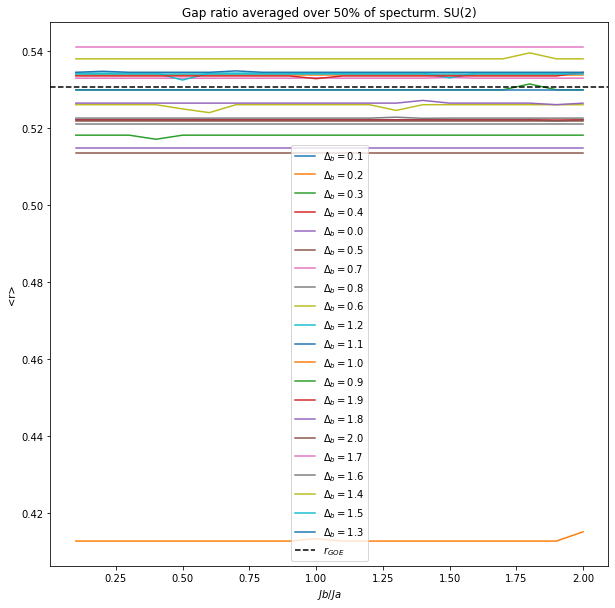

In [10]:
fig, ax = plt.subplots(figsize = (10, 10))
for Db in db:
    plt.plot(tmp.loc[Db,'Jb'], tmp.loc[Db,'gapratios'], label = f'$\Delta _b = {Db}$')
plt.axhline(goe, label = '$r_{GOE}$', linestyle = "--", color='black')
plt.xlabel('$Jb/Ja$')
plt.ylabel('<r>')
plt.title('Gap ratio averaged over 50% of specturm. SU(2)')
plt.legend()

### entropies

In [11]:
ent_max = df.pivot_table(index=['db'], columns=['Jb'], values=['max_ent']).replace(np.nan, 0.0).astype(float)
ent_200 = df.pivot_table(index=['db'], columns=['Jb'], values=['200_ent']).replace(np.nan, 0.0).astype(float)

ent_max

max_ent                                                              \
Jb        0.1       0.2       0.3       0.4       0.5       0.6       0.7   
db                                                                          
0.0  4.919693  4.919693  4.919693  4.919693  4.919693  4.919693  4.919693   
0.1  4.916547  4.916547  4.916547  4.916547  4.916547  4.916547  4.916547   
0.2  4.911359  4.911359  4.911359  4.911359  4.911359  4.911359  4.911359   
0.3  4.918867  4.918867  4.918867  4.918867  4.918867  4.918867  4.918867   
0.4  4.918081  4.918081  4.918081  4.918081  4.918081  4.918081  4.918081   
0.5  4.915724  4.915724  4.915724  4.915724  4.915724  4.915724  4.915724   
0.6  4.911299  4.911299  4.911299  4.911299  4.911156  4.911154  4.911299   
0.7  4.904028  4.904028  4.904028  4.904028  4.904028  4.904028  4.904028   
0.8  4.891335  4.891335  4.891335  4.891335  4.891335  4.891335  4.891335   
0.9  4.883494  4.883494  4.883494  4.883110  4.883494  4.883494  4.883494   
1.0  4.842775  4.842775  4.842775  4.842775  4.842775  4.842775  4.842775   
1.1  4.876371  4.876371  4.876371  4.876371  4.876371  4.876371  4.876371   
1.2  4.883489  4.883489  4.883489  4.883489  4.883210  4.883489  4.883489   
1.3  4.876840  4.877199  4.876840  4.876840  4.876840  4.876840  4.876441   
1.4  4.876008  4.876008  4.876008  4.876008  4.876008  4.876008  4.876008   
1.5  4.883948  4.883948  4.883948  4.883948  4.883948  4.883948  4.883948   
1.6  4.878688  4.878688  4.878688  4.878688  4.878688  4.878688  4.878688   
1.7  4.872990  4.872990  4.872990  4.872990  4.872990  4.872990  4.872990   
1.8  4.873987  4.873987  4.873987  4.873987  4.873987  4.873987  4.873987   
1.9  4.870357  4.870357  4.870357  4.870357  4.870357  4.870357  4.870357   
2.0  4.868404  4.868404  4.868404  4.868404  4.868404  4.868404  4.868404   

                                                                           \
Jb        0.8       0.9       1.0       1.1       1.2       1.3       1.4   
db                                                                          
0.0  4.919693  4.919693  4.919693  4.919693  4.919693  4.919693  4.919693   
0.1  4.916547  4.916547  4.916547  4.916547  4.916547  4.916547  4.916547   
0.2  4.911359  4.911359  4.911359  4.911359  4.911359  4.911359  4.911359   
0.3  4.918867  4.918867  4.918867  4.918867  4.918867  4.918867  4.918867   
0.4  4.918081  4.918081  4.918081  4.918081  4.918081  4.918081  4.918081   
0.5  4.915724  4.915724  4.915724  4.915724  4.915724  4.915724  4.915724   
0.6  4.911299  4.911299  4.911299  4.911299  4.911299  4.910393  4.911299   
0.7  4.904028  4.904028  4.903160  4.904028  4.904028  4.904028  4.904028   
0.8  4.891335  4.891335  4.891335  4.891335  4.891335  4.890984  4.891707   
0.9  4.883494  4.883494  4.883494  4.883494  4.883494  4.883494  4.883494   
1.0  4.842775  4.842775  4.840665  4.842775  4.842775  4.842775  4.842775   
1.1  4.876371  4.876371  4.876371  4.876371  4.876371  4.876371  4.876371   
1.2  4.883489  4.883489  4.883489  4.883489  4.883489  4.883489  4.883489   
1.3  4.876840  4.876840  4.876840  4.876840  4.876840  4.876840  4.876840   
1.4  4.876008  4.876008  4.876008  4.876008  4.876008  4.876008  4.876008   
1.5  4.883948  4.883948  4.883948  4.883948  4.883948  4.883948  4.883948   
1.6  4.878688  4.878688  4.878688  4.878688  4.878688  4.878688  4.878688   
1.7  4.872990  4.872990  4.872990  4.872990  4.872990  4.872990  4.872990   
1.8  4.873987  4.873987  4.873987  4.873987  4.873987  4.873987  4.874005   
1.9  4.870357  4.870357  4.870472  4.870357  4.870357  4.870357  4.870357   
2.0  4.868404  4.868404  4.868404  4.868404  4.868404  4.868404  4.868404   

                                                                 
Jb        1.5       1.6       1.7       1.8       1.9       2.0  
db                                                               
0.0  4.919693  4.919693  4.919693  4.919693  4.919693  4.919693  
0.1  4.916547  4.916547  4.916547  4.916547 

In [12]:
ent_max -= constant_page_correction(N)
ent_200 -= constant_page_correction(N)

In [13]:
ent_max

max_ent                                                              \
Jb        0.1       0.2       0.3       0.4       0.5       0.6       0.7   
db                                                                          
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.1 -0.032057 -0.032057 -0.032057 -0.032057 -0.032057 -0.032057 -0.032057   
0.2 -0.037244 -0.037244 -0.037244 -0.037244 -0.037244 -0.037244 -0.037244   
0.3 -0.029737 -0.029737 -0.029737 -0.029737 -0.029737 -0.029737 -0.029737   
0.4 -0.030523 -0.030523 -0.030523 -0.030523 -0.030523 -0.030523 -0.030523   
0.5 -0.032880 -0.032880 -0.032880 -0.032880 -0.032880 -0.032880 -0.032880   
0.6 -0.037305 -0.037305 -0.037305 -0.037305 -0.037448 -0.037450 -0.037305   
0.7 -0.044576 -0.044576 -0.044576 -0.044576 -0.044576 -0.044576 -0.044576   
0.8 -0.057269 -0.057269 -0.057269 -0.057269 -0.057269 -0.057269 -0.057269   
0.9 -0.065110 -0.065110 -0.065110 -0.065494 -0.065110 -0.065110 -0.065110   
1.0 -0.105829 -0.105829 -0.105829 -0.105829 -0.105829 -0.105829 -0.105829   
1.1 -0.072233 -0.072233 -0.072233 -0.072233 -0.072233 -0.072233 -0.072233   
1.2 -0.065115 -0.065115 -0.065115 -0.065115 -0.065394 -0.065115 -0.065115   
1.3 -0.071764 -0.071404 -0.071764 -0.071764 -0.071764 -0.071764 -0.072163   
1.4 -0.072596 -0.072596 -0.072596 -0.072596 -0.072596 -0.072596 -0.072596   
1.5 -0.064656 -0.064656 -0.064656 -0.064656 -0.064656 -0.064656 -0.064656   
1.6 -0.069916 -0.069916 -0.069916 -0.069916 -0.069916 -0.069916 -0.069916   
1.7 -0.075614 -0.075614 -0.075614 -0.075614 -0.075614 -0.075614 -0.075614   
1.8 -0.074617 -0.074617 -0.074617 -0.074617 -0.074617 -0.074617 -0.074617   
1.9 -0.078247 -0.078247 -0.078247 -0.078247 -0.078247 -0.078247 -0.078247   
2.0 -0.080200 -0.080200 -0.080200 -0.080200 -0.080200 -0.080200 -0.080200   

                                                                           \
Jb        0.8       0.9       1.0       1.1       1.2       1.3       1.4   
db                                                                          
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.1 -0.032057 -0.032057 -0.032057 -0.032057 -0.032057 -0.032057 -0.032057   
0.2 -0.037244 -0.037244 -0.037244 -0.037244 -0.037244 -0.037244 -0.037244   
0.3 -0.029737 -0.029737 -0.029737 -0.029737 -0.029737 -0.029737 -0.029737   
0.4 -0.030523 -0.030523 -0.030523 -0.030523 -0.030523 -0.030523 -0.030523   
0.5 -0.032880 -0.032880 -0.032880 -0.032880 -0.032880 -0.032880 -0.032880   
0.6 -0.037305 -0.037305 -0.037305 -0.037305 -0.037305 -0.038211 -0.037305   
0.7 -0.044576 -0.044576 -0.045444 -0.044576 -0.044576 -0.044576 -0.044576   
0.8 -0.057269 -0.057269 -0.057269 -0.057269 -0.057269 -0.057620 -0.056897   
0.9 -0.065110 -0.065110 -0.065110 -0.065110 -0.065110 -0.065110 -0.065110   
1.0 -0.105829 -0.105829 -0.107939 -0.105829 -0.105829 -0.105829 -0.105829   
1.1 -0.072233 -0.072233 -0.072233 -0.072233 -0.072233 -0.072233 -0.072233   
1.2 -0.065115 -0.065115 -0.065115 -0.065115 -0.065115 -0.065115 -0.065115   
1.3 -0.071764 -0.071764 -0.071764 -0.071764 -0.071764 -0.071764 -0.071764   
1.4 -0.072596 -0.072596 -0.072596 -0.072596 -0.072596 -0.072596 -0.072596   
1.5 -0.064656 -0.064656 -0.064656 -0.064656 -0.064656 -0.064656 -0.064656   
1.6 -0.069916 -0.069916 -0.069916 -0.069916 -0.069916 -0.069916 -0.069916   
1.7 -0.075614 -0.075614 -0.075614 -0.075614 -0.075614 -0.075614 -0.075614   
1.8 -0.074617 -0.074617 -0.074617 -0.074617 -0.074617 -0.074617 -0.074599   
1.9 -0.078247 -0.078247 -0.078132 -0.078247 -0.078247 -0.078247 -0.078247   
2.0 -0.080200 -0.080200 -0.080200 -0.080200 -0.080200 -0.080200 -0.080200   

                                                                 
Jb        1.5       1.6       1.7       1.8       1.9       2.0  
db                                                               
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911  
0.1 -0.032057 -0.032057 -0.032057 -0.032057 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Jb        0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
db                                                                          
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   
0.0 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911 -0.028911   

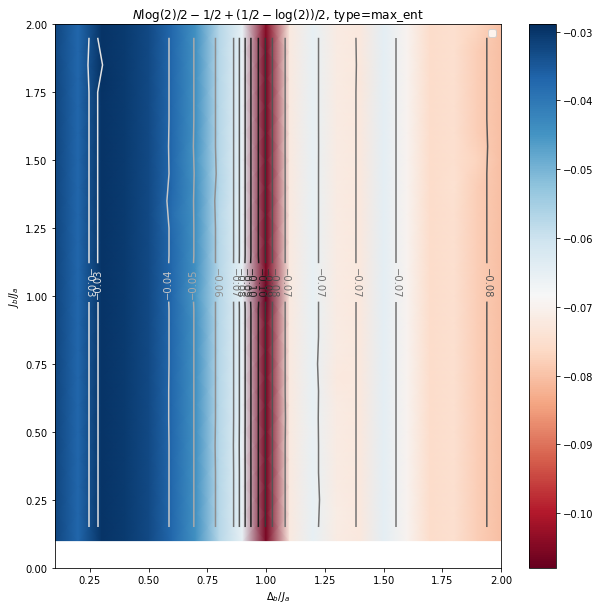

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Jb        0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
db                                                                          
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   
0.3 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154 -0.177154   

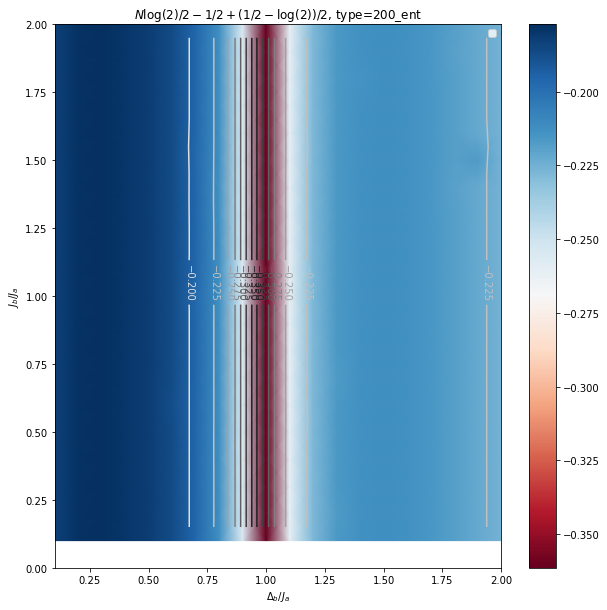

In [14]:
plot_heatmap_values(ent_max, 'max_ent')
plot_heatmap_values(ent_200, '200_ent')

# SU2 breaking

In [5]:
N = 14
directory = current_dir + f"{kPSep}new_results{kPSep}new_results{kPSep}xyz_nsu2_bc=0{kPSep}resultsXYZ{N}{kPSep}"


In [6]:
df = get_log_file(directory)
df

,model,max_ent,200_ent,Ns,Ja,Jb,hx,hz,da,db,ea,eb,k,p,x,bc,model_short
0,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.315620,4.039759,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,0.0,-1.0,-1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
1,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.305523,4.096718,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,0.0,1.0,-1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
2,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.294212,4.023832,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,0.0,-1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
3,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.340394,4.115270,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,0.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
4,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.314571,4.199728,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,1.0,1.0,-1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7350,"_xyz_sym,Ns=14,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.304801,4.230295,14.0,1.0,2.0,0.0,1.0,0.9,0.9,0.5,0.5,9.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=2.00,hx=0.00,hz=1.00..."
7351,"_xyz_sym,Ns=14,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.308010,4.226479,14.0,1.0,2.0,0.0,1.0,0.9,0.9,0.5,0.5,10.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=2.00,hx=0.00,hz=1.00..."
7352,"_xyz_sym,Ns=14,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.305060,4.229967,14.0,1.0,2.0,0.0,1.0,0.9,0.9,0.5,0.5,11.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=2.00,hx=0.00,hz=1.00..."
7353,"_xyz_sym,Ns=14,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.298967,4.229478,14.0,1.0,2.0,0.0,1.0,0.9,0.9,0.5,0.5,12.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=2.00,hx=0.00,hz=1.00..."


In [7]:
set_gap_ratios_df_log(df)
df

directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist
directory does not exist


,model,max_ent,200_ent,Ns,Ja,Jb,hx,hz,da,db,ea,eb,k,p,x,bc,model_short,gapratios,Nh
0,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.315620,4.039759,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,0.0,-1.0,-1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.422651,261
1,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.305523,4.096718,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,0.0,1.0,-1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.503544,325
2,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.294212,4.023832,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,0.0,-1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.437256,234
3,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.340394,4.115270,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,0.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.417779,362
4,"_xyz_sym,Ns=14,Ja=1.0000,Jb=0.1000,hx=0.0000,h...",4.314571,4.199728,14.0,1.0,0.1,0.0,0.0,0.9,0.9,0.5,0.5,1.0,1.0,-1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=0.10,hx=0.00,hz=0.00...",0.450405,585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7350,"_xyz_sym,Ns=14,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.304801,4.230295,14.0,1.0,2.0,0.0,1.0,0.9,0.9,0.5,0.5,9.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=2.00,hx=0.00,hz=1.00...",0.000000,0
7351,"_xyz_sym,Ns=14,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.308010,4.226479,14.0,1.0,2.0,0.0,1.0,0.9,0.9,0.5,0.5,10.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=2.00,hx=0.00,hz=1.00...",0.000000,0
7352,"_xyz_sym,Ns=14,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.305060,4.229967,14.0,1.0,2.0,0.0,1.0,0.9,0.9,0.5,0.5,11.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=2.00,hx=0.00,hz=1.00...",0.000000,0
7353,"_xyz_sym,Ns=14,Ja=1.0000,Jb=2.0000,hx=0.0000,h...",4.298967,4.229478,14.0,1.0,2.0,0.0,1.0,0.9,0.9,0.5,0.5,12.0,1.0,1.0,0.0,"_xyz_sym,Ns=14,Ja=1.00,Jb=2.00,hx=0.00,hz=1.00...",0.000000,0


In [8]:
# perform averaging over sectors
tmp = df.copy()
tmp['gapratios'] = df['gapratios'] * df['Nh']
tmp = tmp[tmp['gapratios'] != 0].groupby(['Jb','hz'])[['gapratios', 'Nh']].sum().reset_index('Jb')
hzs = tmp.index.unique()
tmp['gapratios'] /= tmp['Nh']

tmp
#tmp[tmp < goe].dropna()

,Jb,gapratios,Nh
hz,,,
0.0,0.1,0.430184,16384
0.1,0.1,0.433973,16384
0.2,0.1,0.439971,16384
0.0,0.2,0.430184,16384
0.1,0.2,0.419721,16384
0.2,0.2,0.433973,16384
0.0,0.3,0.430184,16384
0.1,0.3,0.422307,16384
0.2,0.3,0.420890,16384


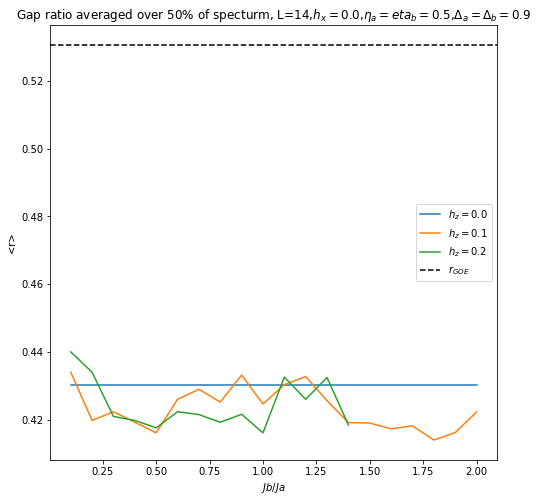

In [30]:
fig, ax = plt.subplots(figsize = (8, 8))
for hz in hzs:
    #print(tmp['Jb'].loc[hz])
    plt.plot(tmp['Jb'].loc[hz], tmp['gapratios'].loc[hz], label = f'$h _z = {hz}$')
plt.axhline(goe, label = '$r_{GOE}$', linestyle = "--", color='black')

plt.xlabel('$Jb/Ja$')
plt.ylabel('<r>')
plt.title(f'Gap ratio averaged over 50% of specturm, L={N},$h_x=0.0$,$\eta _a = eta _b = 0.5$,$\Delta _a = \Delta _b = 0.9$')
plt.legend()
plt.savefig('gap_ratio.png', facecolor = 'white')

In [26]:
ent_max = df.pivot_table(index=['hz'], columns=['Jb'], values=['max_ent']).replace(np.nan, 0.0).astype(float)
ent_200 = df.pivot_table(index=['hz'], columns=['Jb'], values=['200_ent']).replace(np.nan, 0.0).astype(float)

ent_max

max_ent                                                              \
Jb        0.1       0.2       0.3       0.4       0.5       0.6       0.7   
hz                                                                          
0.0  4.317206  4.317206  4.317206  4.317206  4.317206  4.317206  4.317206   
0.1  4.285104  4.304603  4.306409  4.311057  4.309991  4.310489  4.314165   
0.2  4.253145  4.285104  4.302288  4.304603  4.306978  4.306409  4.316712   
0.3  4.217916  4.269945  4.285104  4.300980  4.305870  4.304603  4.308531   
0.4  4.213610  4.253145  4.271527  4.285104  4.294675  4.302288  4.304813   
0.5  4.214830  4.230470  4.261941  4.276015  4.285104  4.295141  4.301609   
0.6  4.215452  4.217916  4.253145  4.269945  4.285849  4.285104  4.292102   
0.7  4.216044  4.212762  4.240379  4.257401  4.271499  4.283035  4.285104   
0.8  4.217269  4.213610  4.222115  4.253145  4.271071  4.271527  4.281318   
0.9  4.218276  4.214329  4.217916  4.240040  4.250966  4.269945  4.272786   
1.0  4.218995  4.214830  4.212277  4.230470  4.253145  4.261941  4.268258   
1.1  4.219529  4.215182  4.213132  4.221360  4.230709  4.255884  4.268135   
1.2  4.219935  4.215452  4.213610  4.217916  4.237488  4.253145  4.269764   
1.3  4.220252  4.215671  4.217193  4.215228  4.222848  4.238519  4.260782   
1.4  4.220505  4.216044  4.214519  4.212762  4.221547  4.240379  4.253145   
1.5  4.220709  4.216606  4.214830  4.213295  4.217916  4.230470  4.244827   
1.6  4.220876  4.217269  4.215076  4.213610  4.212530  4.222115  4.233837   
1.7  4.221015  4.217817  4.215279  4.213979  4.213727  4.227543  4.224956   
1.8  4.221132  4.218276  4.215452  4.214329  4.212976  4.217916  4.228450   
1.9  4.221321  4.218664  4.215602  4.214605  4.213377  4.212586  4.221757   
2.0  4.221617  4.218995  4.215748  4.214830  4.213610  4.212277  4.225717   

                                                                           \
Jb        0.8       0.9       1.0       1.1       1.2       1.3       1.4   
hz                                                                          
0.0  4.317206  4.317206  4.317206  4.317206  4.317206  4.317206  4.317206   
0.1  4.315856  4.315251  4.313039  4.312834  4.313802  4.312120  4.307852   
0.2  4.311057  4.306399  4.309991  4.319893  4.310489  4.311483  4.314364   
0.3  4.314797  4.306409  4.314961  4.311837  4.311057  4.309398  4.312772   
0.4  4.304603  4.312175  4.306978  4.309670  4.306409  4.314358  4.316712   
0.5  4.301710  4.306575  4.304603  4.310819  4.306765  4.312112  4.307594   
0.6  4.300980  4.302288  4.305870  4.303718  4.304603  4.311021  4.308531   
0.7  4.292409  4.294400  4.300365  4.304161  4.308895  4.305780  4.304603   
0.8  4.285104  4.290424  4.294675  4.298289  4.302288  4.305781  4.304813   
0.9  4.280149  4.285104  4.287494  4.288905  4.300980  4.303270  4.301577   
1.0  4.276015  4.280333  4.285104  4.285612  4.295141  4.300179  4.301609   
1.1  4.277271  4.275987  4.284849  4.285104  4.285877  4.289092  4.295093   
1.2  4.269945  4.271527  4.285849  4.287194  4.285104  4.282803  4.292102   
1.3  4.271621  4.266428  4.272534  4.284734  4.287974  4.285104  4.285342   
1.4  4.257401  4.271332  4.271499  4.277109  4.283035  4.286291  4.285104   
1.5  4.257965  4.261941  4.269945  4.278547  4.276015  4.282823  4.285440   
1.6  4.253145  4.259302  4.271071  4.272997  4.271527  4.276133  4.281318   
1.7  4.245667  4.256817  4.272768  4.267756  4.271048  4.275600  4.280415   
1.8  4.240040  4.253145  4.250966  4.265682  4.269945  4.275652  4.272786   
1.9  4.236332  4.247151  4.251206  4.264375  4.268403  4.271949  4.274710   
2.0  4.230470  4.233625  4.253145  4.251317  4.261941  4.267430  4.268258   

                                                                 
Jb        1.5       1.6       1.7       1.8       1.9       2.0  
hz                                                               
0.0  4.317206  4.317206  4.317206  4.317206  4.317206  4.317206  
0.1  4.309175  4.308037  4.308126  4.307934 

In [27]:
ent_max -= constant_page_correction(N)
ent_200 -= constant_page_correction(N)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Jb        0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
hz                                                                          
0.2 -0.002312  0.029647  0.046832  0.049146  0.051522  0.050952  0.061255   
0.4 -0.041847 -0.002312  0.016070  0.029647  0.039218  0.046832  0.049356   
0.6 -0.040005 -0.037541 -0.002312  0.014488  0.030392  0.029647  0.036645   
0.7 -0.039413 -0.042694 -0.015078  0.001945  0.016043  0.027578  0.029647   
1.0 -0.036461 -0.040627 -0.043180 -0.024986 -0.002312  0.006485  0.012801   
1.1 -0.035928 -0.040274 -0.042325 -0.034096 -0.024748  0.000428  0.012678   
1.4 -0.034952 -0.039413 -0.040937 -0.042694 -0.033910 -0.015078 -0.002312   
1.4 -0.034952 -0.039413 -0.040937 -0.042694 -0.033910 -0.015078 -0.002312   
1.7 -0.034442 -0.037640 -0.040177 -0.041478 -0.041730 -0.027914 -0.030501   
2.0 -0.033839 -0.036461 -0.039709 -0.040627 -0.041847 -0.043180 -0.029739   
2.0 -0.033839 -0.036461 -0.039709 -0.040627 -0.041847 -0.043180 -0.029739   

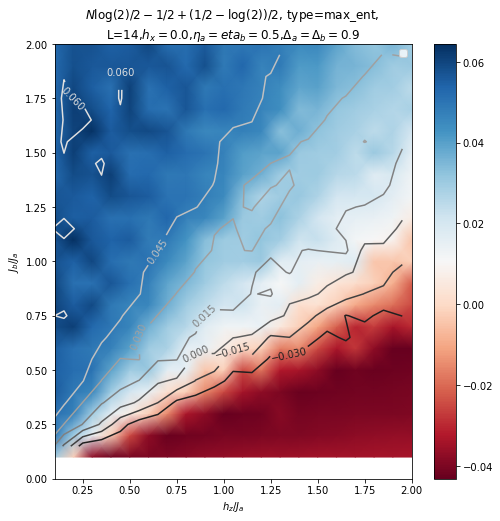

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Jb        0.1       0.2       0.3       0.4       0.5       0.6       0.7  \
hz                                                                          
0.1 -0.075679 -0.038969 -0.032781 -0.029711 -0.029398 -0.030410 -0.031233   
0.1 -0.075679 -0.038969 -0.032781 -0.029711 -0.029398 -0.030410 -0.031233   
0.1 -0.075679 -0.038969 -0.032781 -0.029711 -0.029398 -0.030410 -0.031233   
0.1 -0.075679 -0.038969 -0.032781 -0.029711 -0.029398 -0.030410 -0.031233   
0.1 -0.075679 -0.038969 -0.032781 -0.029711 -0.029398 -0.030410 -0.031233   
0.1 -0.075679 -0.038969 -0.032781 -0.029711 -0.029398 -0.030410 -0.031233   
0.2 -0.184232 -0.075679 -0.049769 -0.038969 -0.034406 -0.032781 -0.030975   
0.2 -0.184232 -0.075679 -0.049769 -0.038969 -0.034406 -0.032781 -0.030975   
0.2 -0.184232 -0.075679 -0.049769 -0.038969 -0.034406 -0.032781 -0.030975   
0.2 -0.184232 -0.075679 -0.049769 -0.038969 -0.034406 -0.032781 -0.030975   
0.2 -0.184232 -0.075679 -0.049769 -0.038969 -0.034406 -0.032781 -0.030975   

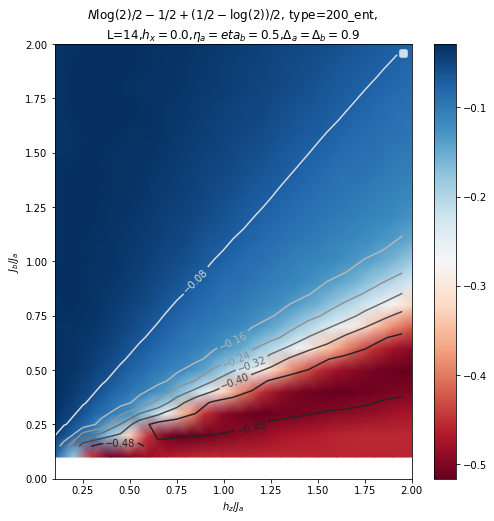

In [28]:
plot_heatmap_values(ent_max, 'max_ent', '$h_z/J_a$', '$J_b/J_a$', f'L={N},$h_x=0.0$,$\eta _a = eta _b = 0.5$,$\Delta _a = \Delta _b = 0.9$')
plot_heatmap_values(ent_200, '200_ent', '$h_z/J_a$', '$J_b/J_a$', f'L={N},$h_x=0.0$,$\eta _a = eta _b = 0.5$,$\Delta _a = \Delta _b = 0.9$')

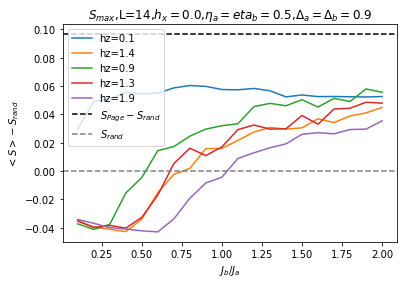

In [103]:
# plot in J2
for hz in ent_max.sample(5).index:
    ent_max['max_ent'].loc[hz].plot(label = f'hz={hz}')

plt.axhline(-constant_page_correction(N) + page_val(N), label = '$S_{Page} - S_{rand}$', linestyle = "--", color='black')
plt.axhline(0.0, linestyle='--', color = 'gray', label = '$S_{rand}$')
plt.title('$S_{max}$' + f',L={N},$h_x=0.0$,$\eta _a = eta _b = 0.5$,$\Delta _a = \Delta _b = 0.9$')
plt.ylabel('$<S> - S_{rand}$')
plt.xlabel('$J_b/J_a$')
plt.legend()

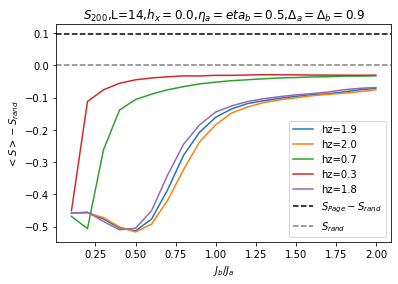

In [31]:
# plot in J2
for hz in ent_max.sample(5).index:
    ent_200['200_ent'].loc[hz].plot(label = f'hz={hz}')

plt.axhline(-constant_page_correction(N) + page_val(N), label = '$S_{Page} - S_{rand}$', linestyle = "--", color='black')
plt.axhline(0.0, linestyle='--', color = 'gray', label = '$S_{rand}$')
plt.title('$S_{200}$' + f',L={N},$h_x=0.0$,$\eta _a = eta _b = 0.5$,$\Delta _a = \Delta _b = 0.9$')
plt.ylabel('$<S> - S_{rand}$')
plt.xlabel('$J_b/J_a$')
plt.legend()